data contains the questions from the 16 Personality Tests and their answers in the Scale that they use but is numerically encoded:

Fully Agree: 3

Partially Agree: 2

Slightly Agree: 1

neutral -> 0

Slightly disagree: -1

Partially disagree: -2

Fully disagree: -3

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/16P.csv', encoding='latin1')
df.head(10)

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
5,5,0,0,1,0,1,-2,-1,0,2,...,0,3,0,2,0,0,2,2,1,INTJ
6,6,0,0,-2,0,-1,1,-2,0,1,...,0,-2,1,2,0,0,-1,-1,1,ISFP
7,7,0,0,-3,0,-1,0,-2,0,0,...,0,-1,0,1,0,0,-1,2,-1,INTJ
8,8,0,0,-2,1,-2,1,-1,0,2,...,0,1,0,1,0,0,3,2,-2,ENTJ
9,9,0,-1,0,0,-1,2,1,0,-2,...,0,-1,0,-1,0,0,1,0,1,ESFP


inspect Data

In [ ]:
df.shape

(59999, 62)

In [ ]:
df.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [9]:
df.drop('Response Id', axis=1, inplace=True)

In [10]:
new = ['Q'+str(i) for i in range(1,len(df.columns))]
new.append('Personality')
df.columns = new
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [14]:
for col in df.columns:
  print(col, df[col].unique())

Q1 [ 0 -1  1 -2]
Q2 [ 0 -1  1]
Q3 [ 0 -2  2  3 -1  1 -3]
Q4 [ 0 -3 -1  1  3 -2  2]
Q5 [ 0 -1  2  1 -2 -3  3]
Q6 [ 1  2  0 -1 -2  3 -3]
Q7 [ 1 -2  0 -1  2  3 -3]
Q8 [ 0 -1  1  2]
Q9 [ 0  3  1 -2  2 -1 -3]
Q10 [ 0  1 -1]
Q11 [ 0 -2  2  1 -1  3 -3]
Q12 [ 1  0 -1 -2  3  2 -3]
Q13 [ 1 -2 -1  0  2 -3  3]
Q14 [ 0  1 -1 -2  2  3 -3]
Q15 [ 1  0 -1  3  2 -2 -3]
Q16 [-1 -2  2  0  1  3 -3]
Q17 [-1 -2  0  2 -3  1  3]
Q18 [ 0  1 -3 -1 -2  2  3]
Q19 [ 0 -1  2  1 -2  3 -3]
Q20 [ 0  3  1  2 -2 -1 -3]
Q21 [ 0  1 -1  2 -2]
Q22 [ 0  2  1 -1 -3 -2  3]
Q23 [ 0 -1  1  2]
Q24 [ 0 -1  1]
Q25 [ 0  1  2 -1 -2 -3  3]
Q26 [ 0 -2 -1  2  1 -3  3]
Q27 [ 0 -2 -1  2  1 -3  3]
Q28 [ 0  1 -1]
Q29 [ 0 -2 -1  1  2 -3  3]
Q30 [-1  1  2 -2  0  3 -3]
Q31 [ 0  2  3 -1  1 -3 -2]
Q32 [ 0  1 -1]
Q33 [ 0 -1  1 -2  3 -3  2]
Q34 [ 0  1 -1]
Q35 [ 0 -1  1 -2  3  2 -3]
Q36 [-1  0  2  1 -3 -2  3]
Q37 [ 0  1 -2  3 -3 -1  2]
Q38 [-1  2  0  3 -2 -3  1]
Q39 [ 1  2 -2 -3 -1  0  3]
Q40 [-1  2  0 -2 -3  1  3]
Q41 [ 0 -1  1  2 -2 -3  3]
Q42 [ 0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,59999.0,-0.000867,0.365701,-2.0,0.0,0.0,0.0,1.0
Q2,59999.0,-0.000467,0.364652,-1.0,0.0,0.0,0.0,1.0
Q3,59999.0,0.000267,1.527343,-3.0,-1.0,0.0,1.0,3.0
Q4,59999.0,-0.232887,1.502173,-3.0,-1.0,0.0,1.0,3.0
Q5,59999.0,-0.175653,1.502999,-3.0,-1.0,0.0,1.0,3.0
Q6,59999.0,0.005317,1.521413,-3.0,-1.0,0.0,1.0,3.0
Q7,59999.0,-0.476558,1.445931,-3.0,-2.0,-1.0,0.0,3.0
Q8,59999.0,-0.000550,0.367361,-1.0,0.0,0.0,0.0,2.0
Q9,59999.0,0.126819,1.537329,-3.0,-1.0,0.0,1.0,3.0
Q10,59999.0,-0.003283,0.367347,-1.0,0.0,0.0,0.0,1.0


boxplot

/tmp/ipython-input-3139802565.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(df[q_cols].values,
/tmp/ipython-input-3139802565.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(df[q_cols].values,
/tmp/ipython-input-3139802565.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(df[q_cols].values,


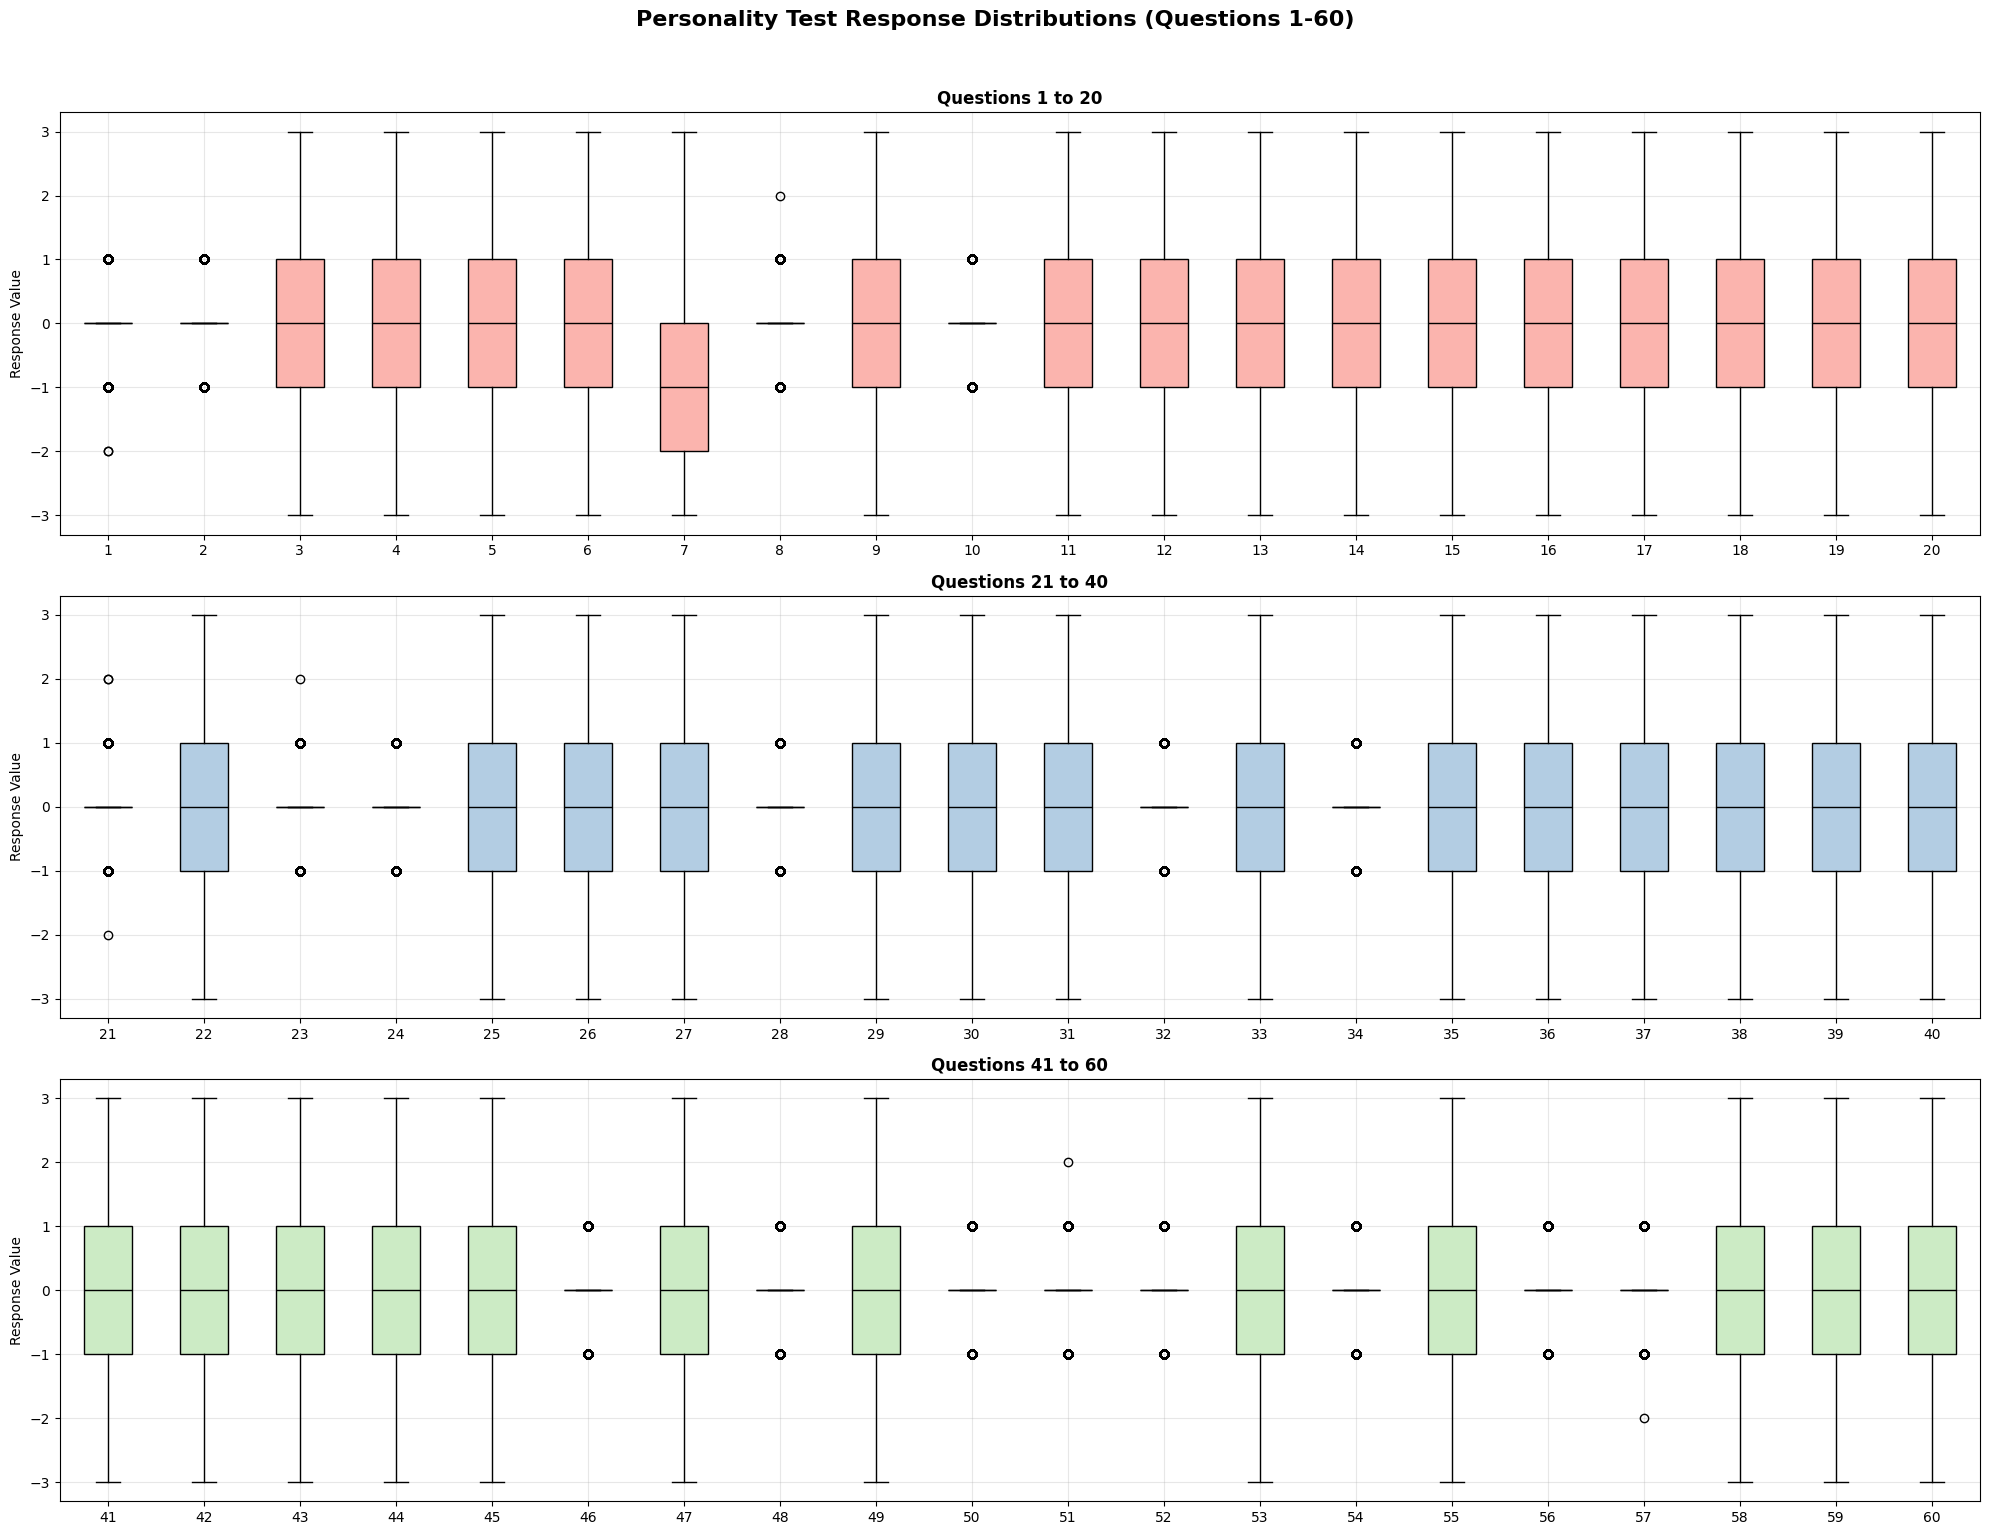

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

for i, ax in enumerate(axes):
    start_q = i * 20
    end_q = (i + 1) * 20

    q_cols = df.columns[start_q:end_q]

    bp = ax.boxplot(df[q_cols].values,
                    labels=range(start_q+1, end_q+1),
                    patch_artist=True,
                    medianprops={'color': 'black'},
                    boxprops={'linewidth': 1})

    for box in bp['boxes']:
        box.set_facecolor(plt.cm.Pastel1(i))

    ax.set_title(f'Questions {start_q+1} to {end_q}', fontweight='bold')
    ax.set_ylabel('Response Value')
    ax.grid(True, alpha=0.3)

plt.suptitle('Personality Test Response Distributions (Questions 1-60)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [8]:
df[col].value_counts()

,count
You often make a backup plan for a backup plan.,
-1,13892
0,13804
1,10416
-2,9933
2,6597
-3,3316
3,2041


In [ ]:
df.groupby('Personality').agg({'Personality' : 'count'})

,Personality
Personality,
ENFJ,3743
ENFP,3760
ENTJ,3737
ENTP,3760
ESFJ,3746
ESFP,3769
ESTJ,3759
ESTP,3749
INFJ,3761


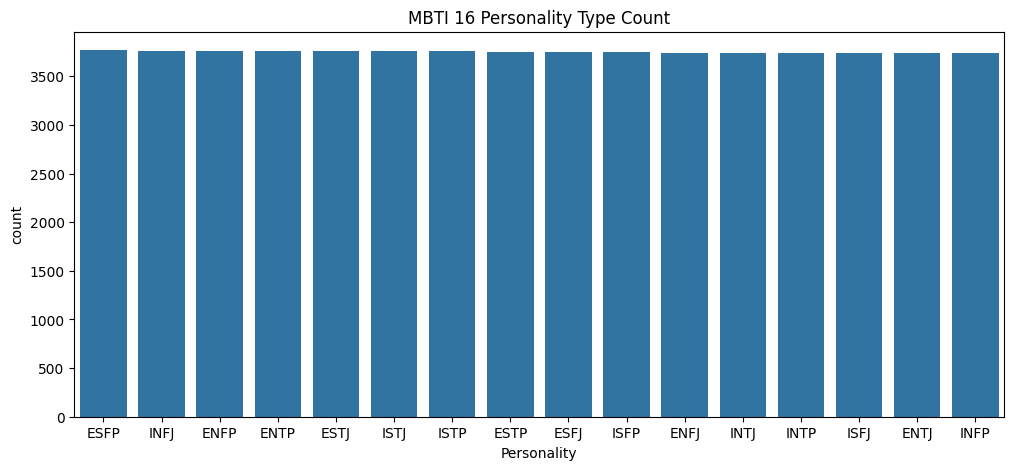

In [21]:
plt.figure(figsize=(12,5))
sns.countplot( x='Personality', data=df, order=df['Personality'].value_counts().index)
plt.title("MBTI 16 Personality Type Count")
plt.show()

In [13]:
df.isnull().sum()

,0
Q1,0
Q2,0
Q3,0
Q4,0
Q5,0
...,...
Q57,0
Q58,0
Q59,0
Q60,0


In [ ]:
has_duplicates = df.duplicated().any()
print(f"has huplicates: {has_duplicates}")

has huplicates: False


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality'])

df['Personality'].value_counts()

,count
Personality,
5,3769
8,3761
1,3760
3,3760
6,3759
14,3756
15,3755
7,3749
4,3746


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib

In [ ]:
log_clf = LogisticRegression()
scores = cross_val_score(log_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.91864583 0.91302083 0.91854167 0.9171875  0.91644963]
Mean accuracy: 0.9167690927006286


In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.99       0.98833333 0.98885417 0.98979167 0.98801959]
Mean accuracy: 0.9889997504080286


In [ ]:
svm_clf = SVC()
scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.98916667 0.9878125  0.98864583 0.98927083 0.98812376]
Mean accuracy: 0.9886039192450603


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500,random_state = 42)
scores = cross_val_score(rnd_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.97895833 0.97770833 0.97770833 0.9784375  0.9749974 ]
Mean accuracy: 0.9775619791124075


Fine-tuning the KNN model using GridSearch

In [ ]:
param_grid = {
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best score: 0.9892497612598534


In [ ]:
best_knn_clf = grid_search.best_estimator_

Evaluate on test set

In [ ]:
y_pred = best_knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.9899166666666667


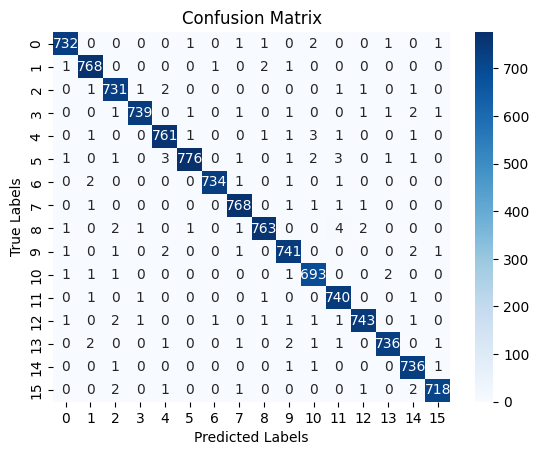

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.99      0.99      0.99       773
           2       0.99      0.99      0.99       738
           3       0.99      0.99      0.99       748
           4       0.99      0.99      0.99       770
           5       0.99      0.98      0.99       790
           6       1.00      0.99      1.00       739
           7       0.99      0.99      0.99       773
           8       0.99      0.98      0.99       775
           9       0.99      0.99      0.99       749
          10       0.98      0.99      0.99       699
          11       0.98      0.99      0.99       744
          12       0.99      0.99      0.99       753
          13       0.99      0.99      0.99       745
          14       0.99      0.99      0.99       740
          15       0.99      0.99      0.99       725

    accuracy                           0.99     12000
  

In [ ]:
joblib.dump(best_knn_clf, 'knn_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']